In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [2]:
df=pd.read_csv(r"C:\Users\varun\OneDrive\Desktop\workshop\fishiris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [5]:
x=df.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=df.loc[:,'Name']

print(x,y)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns] 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Name, Length: 150, dtype: object


In [6]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:

xtrain, xtest, ytrain, ytest = train_test_split( 
             x, y, test_size = 0.25, random_state = 0) 

In [8]:
model = KNeighborsClassifier(n_neighbors = 5,p=2) 
model.fit(xtrain, ytrain)
pred=model.predict(xtest)

In [9]:

k=[]
a=[]
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors = i,p=2)
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    cm=confusion_matrix(ytest,pred)
    acc=(cm[0,0]+cm[1,1]+cm[2,2])/np.sum(cm)
    k.append(i)
    a.append(acc)
print(k,a)

[1, 2, 3, 4, 5, 6, 7, 8, 9] [0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


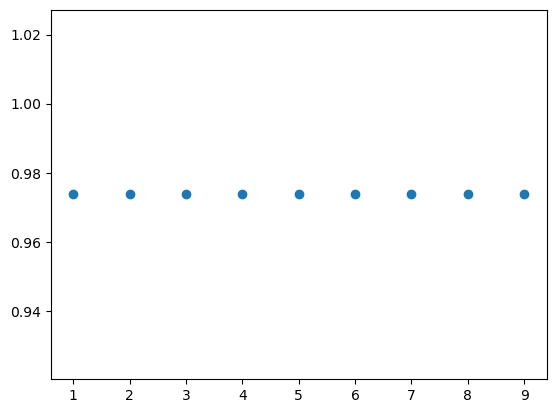

In [10]:
plt.scatter(k,a)
plt.show()

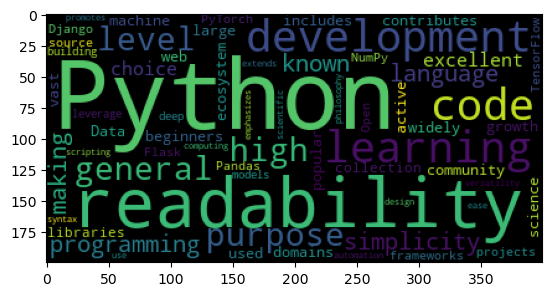

In [21]:

t="""
Python is a high-level, general-purpose programming language.
It is known for its simplicity and readability, making it an excellent choice for beginners.
Python has a large and active community that contributes to its growth and development.
Data science, machine learning, and web development are popular domains where Python is widely used.
The Python ecosystem includes a vast collection of libraries and frameworks, such as NumPy, Pandas, Django, and Flask.
Open-source projects like TensorFlow and PyTorch leverage Python for building deep learning models.
Python's versatility extends to automation, scripting, and scientific computing.
The syntax of Python emphasizes code readability, and its design philosophy promotes code readability and ease of use.
"""
w = WordCloud().generate_from_text(t)
plt.imshow(w)
plt.show()